In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
train = pd.read_csv("./train.csv")
features = train.drop(columns="quality")
print(features.keys())
keys = ["fixed acidity", "volatile acidity", "free sulfur dioxide", "density", "pH"]

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [102]:
dim = len(keys)

In [103]:
X_label = np.ndarray(shape=(1 + dim,len(features)),dtype=float)

for i in range(len(features)):
    X_label[0][i] = 1.0
for d, key in enumerate(keys):
    X_label[d+1] = features[key].values

Y_label = train["quality"].values
Y_label = Y_label.reshape((1,len(Y_label)))

X_label = X_label.transpose() # train_test_splitするために転置を取る
Y_label = Y_label.transpose() # train_test_splitするために転置を取る
# print(X_label.shape,X_label)
# print(Y_label.shape,Y_label)

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_label, Y_label,test_size=0.4)
X_train = X_train.transpose()
# X_test = X_test.transpose()
Y_train = Y_train.transpose()
# Y_test = Y_test.transpose()
# print(X_test.shape, X_test)
# print(Y_test.shape, Y_test)

In [105]:
B = np.where(np.isnan(X_train), 0, X_train).dot(np.where(np.isnan(Y_train.T), 0, Y_train.T))
A = np.where(np.isnan(X_train), 0, X_train).dot(np.where(np.isnan(X_train.T), 0, X_train.T))

L = 0.0 # 正則化の程度を決めるハイパーパラメータ
LI = np.identity(1 + dim) * L

AT = np.linalg.inv(A + LI)
w = np.where(np.isnan(AT), 0, AT).dot(np.where(np.isnan(B), 0, B))
# print(B)
# print(A)
# print(AT)
print(w)

[[ 9.11065353e+01]
 [ 9.08028512e-02]
 [-1.20055909e+00]
 [ 6.45088276e-04]
 [-8.75324362e+01]
 [ 4.70678129e-01]]


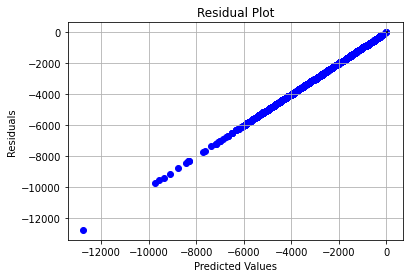

In [106]:
Y_pred = [w[0][0] + sum(w[i + 1][0] * X_test[n][i] for i, _ in enumerate(keys)) for n in range(len(X_test))]
plt.scatter(Y_pred, [p - t for p, t in zip(Y_pred, Y_test)], color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()

In [123]:
lr = LinearRegression()
lr.fit(np.where(np.isnan(X_train.T), 0, X_train.T), Y_train.T)
Y_train_pred = lr.predict(np.where(np.isnan(X_train.T), 0, X_train.T)) # 学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(Y_train.T, Y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', mean_squared_error(np.where(np.isnan(Y_pred), 0, Y_pred), Y_test))         # 検証データを用いたときの平均二乗誤差を出力

MSE train data:  0.656821346283502
[[7]
 [5]
 [5]
 ...
 [6]
 [6]
 [5]]
MSE test data:  9182074.824839437


In [ ]:
# output prediction for the test data
#test = pd.read_csv("./test.csv")

In [ ]:
#submission = pd.read_csv("./sample_submission.csv", index_col="id")
#submission["quality"] = [w[0][0] + sum(w[i + 1][0] * test[key][n] for i, key in enumerate(keys)) for n in range(len(test))]
#submission.to_csv("submission.csv")